In [83]:
from moviepy.editor import *
from PIL import Image
from copy import deepcopy
from fastai.vision.all import *
import cv2
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import time
import numpy as np
import subprocess
import matplotlib.pyplot as plt
import time
from tkinter import Tk
from tkinter import filedialog


In [84]:
Tk().withdraw()
filenames = filedialog.askopenfilenames()
print (filenames)

('C:/Users/Szymon/Downloads/rock.mp3',)


In [85]:
y, sr = librosa.load(filenames[0])

In [86]:
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)

In [87]:
tempo

151.99908088235293

In [88]:
onset_env = librosa.onset.onset_strength(y, sr=sr)

In [89]:
 dtempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr,                          aggregate=None)

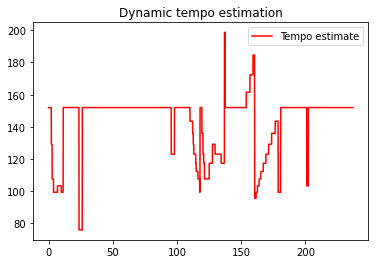

In [91]:
plt.figure()
hop_length = 512
# tg = librosa.feature.tempogram(onset_envelope=onset_env, sr=sr,
#                                hop_length=hop_length)
# librosa.display.specshow(tg, x_axis='time', y_axis='tempo')
plt.plot(librosa.frames_to_time(np.arange(len(dtempo))), dtempo,
         color='r', linewidth=1.5, label='Tempo estimate')
plt.title('Dynamic tempo estimation')
plt.legend(frameon=True, framealpha=0.75)

array([152., 152., 152., ..., 152., 152., 152.])

42.988571428571426

In [95]:
librosa.frames_to_time(np.arange(len(dtempo)))

array([0.00000000e+00, 2.32199546e-02, 4.64399093e-02, ...,
       2.36889977e+02, 2.36913197e+02, 2.36936417e+02])

In [96]:
signal = []
new_arr = []
for i in range(len(dtempo)-1):
    if i >=0:
        if dtempo[i-1] == dtempo[i]:
            new_arr.append(dtempo[i-1])
        else:
            signal.append(new_arr)
            new_arr=[]
            new_arr.append(dtempo[i])

In [99]:
len(signal)

47